#**Question 7.**

**You are provided with a dataset containing heights (in centimeters) of a sample of individuals. Your
task is to estimate the confidence interval for the mean height using the bootstrap method. Ensure your results
are reproducible by setting a seed for the random number generator. You are not to use any existing libraries or
functions to perform the bootstrap resampling**

**a. Create a synthetic dataset with at least 50 random height measurements ranging from 140 cm to 220 cm.
For example, you may consider sampling from a Normal distribution with a mean of 170 cm and a standard
deviation of 10 cm.**

In [26]:
import pandas as pd
import numpy as np

#Using random see 42 for reproducibility
np.random.seed(42)
mean=170
standard_deviation=10
minimum_value=140
maximum_value=220
nubmer_of_sample_individual=50
random_sample = np.random.normal(mean, standard_deviation, nubmer_of_sample_individual)
final_sample = random_sample[(random_sample >= minimum_value) & (random_sample <= maximum_value)]

final_sample= final_sample[:nubmer_of_sample_individual].tolist()
print("No of Sample: ",len(final_sample))
print ("\nSample Data: ",final_sample)

No of Sample:  50

Sample Data:  [174.96714153011231, 168.61735698828815, 176.47688538100692, 185.23029856408024, 167.65846625276663, 167.6586304305082, 185.79212815507393, 177.6743472915291, 165.30525614065047, 175.42560043585965, 165.36582307187538, 165.34270246429742, 172.41962271566035, 150.86719755342202, 152.75082167486968, 164.37712470759027, 159.87168879665577, 173.14247332595275, 160.91975924478788, 155.87696298664707, 184.65648768921554, 167.74223699513465, 170.67528204687923, 155.75251813786542, 164.55617275474816, 171.10922589709867, 158.49006422577696, 173.75698018345673, 163.99361310081196, 167.08306250206724, 163.98293387770602, 188.52278184508938, 169.86502775262065, 159.42289071044098, 178.2254491210319, 157.79156350028978, 172.08863595004755, 150.40329876120225, 156.7181395110157, 171.96861235869125, 177.3846657999541, 171.7136828118997, 168.8435171761176, 166.98896304410712, 155.21478009632574, 162.8015579160529, 165.39361229040213, 180.57122226218917, 173.4361828956

**b. Write a function to perform bootstrap resampling, generating 1000 bootstrap samples and calculating the
mean height for each sample.**

In [36]:
import random
random.seed(42)
bootstrap_sample_means = []
bootstrap_samples = 1000

n = len(final_sample)
for _ in range(bootstrap_samples):
    resample = [random.choice(final_sample) for _ in range(n)]
    bootstrap_sample_means.append(np.mean(resample))

print("Bootstrap Sample Means:", bootstrap_sample_means)

Bootstrap Sample Means: [np.float64(168.14410802829443), np.float64(166.56656699687977), np.float64(168.21271685908903), np.float64(168.29045468150179), np.float64(166.4361106014274), np.float64(168.9556259442418), np.float64(168.86120817685475), np.float64(168.44808739910724), np.float64(167.7451487194134), np.float64(167.74051784353634), np.float64(167.5641884328101), np.float64(169.18780819130683), np.float64(166.67603076591047), np.float64(167.02064415497208), np.float64(165.78619536233592), np.float64(169.43197518681984), np.float64(166.3916954278903), np.float64(168.2162922811816), np.float64(168.33620523529217), np.float64(165.3423738076575), np.float64(169.6361235704938), np.float64(164.196109735627), np.float64(169.080051281014), np.float64(169.3109348540704), np.float64(167.56686714475836), np.float64(168.11134404722242), np.float64(170.41365399847507), np.float64(166.97320386303238), np.float64(168.1214086368304), np.float64(166.96488286177018), np.float64(168.7845107625404)

**c. Using the bootstrap means, compute the 95% confidence interval for the mean height by determining the 2.5th
and 97.5th percentiles.**

In [38]:
confidence_interval=95
two_point_five_percentile = np.percentile(bootstrap_sample_means, 2.5)
ninety_seven_point_five_percentile = np.percentile(bootstrap_sample_means, 97.5)

print(f"95% Confidence Interval: ({two_point_five_percentile:.2f}, {ninety_seven_point_five_percentile:.2f})")

95% Confidence Interval: (165.15, 170.37)


**d. Plot a histogram of the bootstrap means and overlay the confidence interval on the plot.**

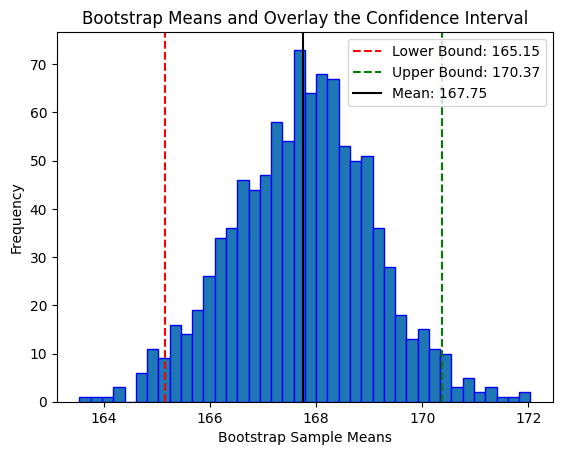

In [50]:
import matplotlib.pyplot as plt

plt.hist(bootstrap_sample_means, bins=40, edgecolor='blue')
plt.axvline(two_point_five_percentile, color='red', linestyle='dashed', label=f'Lower Bound: {two_point_five_percentile:.2f}')
plt.axvline(ninety_seven_point_five_percentile, color='green', linestyle='dashed', label=f'Upper Bound: {ninety_seven_point_five_percentile:.2f}')
plt.axvline(np.mean(bootstrap_sample_means), color='black', linestyle='solid', label=f'Mean: {np.mean(bootstrap_sample_means):.2f}')
plt.xlabel('Bootstrap Sample Means')
plt.ylabel('Frequency')
plt.title('Bootstrap Means and Overlay the Confidence Interval')
plt.legend()
plt.show()

**e. Print the original mean height, the calculated 95% confidence interval, and interpret what this interval implies
about the population mean height based on your sample**

In [57]:
original_mean = np.mean(final_sample)
confidence_interval=95
ninety_five_percentile_ci = np.percentile(bootstrap_sample_means, confidence_interval)

lower_value_ci = np.percentile(bootstrap_sample_means, 100 - confidence_interval)
upper_value_ci = np.percentile(bootstrap_sample_means, confidence_interval)

print(f"Original Mean Height: {original_mean:.2f} cm")
print(f"95% Confidence Interval: ({lower_value_ci:.2f}, {upper_value_ci:.2f})")

print(f"95% CI means, we will get the true population mean height fall between {lower_value_ci:.2f} cm and {upper_value_ci:.2f} cm in 95% of time")

Original Mean Height: 167.75 cm
95% Confidence Interval: (165.52, 169.93)
95% CI means, we will get the true population mean height fall between 165.52 cm and 169.93 cm. in 95% of time


**f. Explore how the number of bootstrap samples (e.g., 500, 2000, 5000) affects the stability of your confidence
interval estimation.**

In [60]:
for num_samples in [500, 2000, 5000]:
    bootstrap_sample_means = []
    bootstrap_samples = num_samples

    n = len(final_sample)
    for _ in range(bootstrap_samples):
        resample = [random.choice(final_sample) for _ in range(n)]
        bootstrap_sample_means.append(np.mean(resample))

    confidence_interval=95
    two_point_five_percentile = np.percentile(bootstrap_sample_means, 2.5)
    ninety_seven_point_five_percentile = np.percentile(bootstrap_sample_means, 97.5)

    print(f"95% Confidence Interval for number samples {num_samples} is: ({two_point_five_percentile:.2f}, {ninety_seven_point_five_percentile:.2f})")




95% Confidence Interval for number samples 500 is: (165.11, 170.29)
95% Confidence Interval for number samples 2000 is: (165.20, 170.43)
95% Confidence Interval for number samples 5000 is: (165.28, 170.35)
